# Entendimiento del Negocio - Contexto - Entrega 3

## 1. Nombre del Proyecto

**Clasificación de impago de tarjeta de credito de clientes de un banco**

---

## 2. Objetivo del Proyecto

Desarrollar y evaluar un modelo de clasificación que prediga la probabilidad de impago de los clientes de tarjetas de crédito de un banco, utilizando el dataset público “Default of Credit Card Clients” (UCI / Kaggle). El resultado apoyará la toma de decisiones de riesgo al identificar oportunamente clientes con alta probabilidad de incumplimiento. Lo anterior usando herramientas y conceptos propios de las metodologías agiles aplicadas a la ciencia de datos.

- **Fuente de datos**: [Default of Credit Card Clients (Kaggle)](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset)

---


## 3. Alcance del Proyecto


- **Datos:** dataset **Default of Credit Card Clients Dataset**de 30 000 registros y 23 variables.
  - **ID**: Identificador de cada cliente.
  - **LIMIT_BAL**: Monto de crédito otorgado en dólares NTD (dólar taiwanés), incluye crédito individual y familiar/suplementario.
  - **SEX**: Género (1 = masculino, 2 = femenino).
  - **EDUCATION**: Nivel educativo (1 = posgrado, 2 = universidad, 3 = bachillerato, 4 = otros, 5 = desconocido, 6 = desconocido).
  - **MARRIAGE**: Estado civil (1 = casado, 2 = soltero, 3 = otros).
  - **AGE**: Edad en años.
  - **PAY_0**: Estado de pago en septiembre de 2005 (–1 = pago puntual, 1 = retraso de un mes, 2 = retraso de dos meses, …, 8 = retraso de ocho meses, 9 = retraso de nueve meses o más).
  - **PAY_2**: Estado de pago en agosto de 2005 (misma escala).
  - **PAY_3**: Estado de pago en julio de 2005 (misma escala).
  - **PAY_4**: Estado de pago en junio de 2005 (misma escala).
  - **PAY_5**: Estado de pago en mayo de 2005 (misma escala).
  - **PAY_6**: Estado de pago en abril de 2005 (misma escala).
  - **BILL_AMT1**: Monto de la factura en septiembre de 2005 (dólares NTD).
  - **BILL_AMT2**: Monto de la factura en agosto de 2005 (dólares NTD).
  - **BILL_AMT3**: Monto de la factura en julio de 2005 (dólares NTD).
  - **BILL_AMT4**: Monto de la factura en junio de 2005 (dólares NTD).
  - **BILL_AMT5**: Monto de la factura en mayo de 2005 (dólares NTD).
  - **BILL_AMT6**: Monto de la factura en abril de 2005 (dólares NTD).
  - **PAY_AMT1**: Monto del pago anterior en septiembre de 2005 (dólares NTD).
  - **PAY_AMT2**: Monto del pago anterior en agosto de 2005 (dólares NTD).
  - **PAY_AMT3**: Monto del pago anterior en julio de 2005 (dólares NTD).
  - **PAY_AMT4**: Monto del pago anterior en junio de 2005 (dólares NTD).
  - **PAY_AMT5**: Monto del pago anterior en mayo de 2005 (dólares NTD).
  - **PAY_AMT6**: Monto del pago anterior en abril de 2005 (dólares NTD).
  - **default.payment.next.month**: Indicador de impago el mes siguiente (1 = sí, 0 = no).


- **Fases TDSP** alineadas con la rúbrica del curso:
  1. Entendimiento del negocio y carga de datos.
  2. Preprocesamiento y Análisis exploratorio de datos (EDA).
  3. Modelamiento y Extracción de características.
  4. Despliegue (prototipo local/API) y gestión de versiones.
  5. Evaluación final y presentación.
- **Herramientas** a usar:
  - **Git** → versionamiento de código.
  - **DVC** → versionamiento de datos.
  - **MLflow** → seguimiento de experimentos y modelos.
  - Python, pandas, scikit‑learn, Jupyter, FastAPI (opcional para demo).
- **Entregables** por fase:

| Fase | Entregables obligatorios (según rúbrica) |
|------|-------------------------------------------|
| 1 | Marco de proyecto, código de carga de datos, diccionario de datos |
| 2 | Código de preprocesamiento/EDA, resumen estadístico, visualizaciones |
| 3 | Código de extracción de características, notebooks de modelamiento, reporte de línea base y modelo final (MLflow) |
| 4 | Código de despliegue (prototipo), documentación de despliegue y entorno |
| 5 | Código de evaluación, interpretación de resultados, video de presentación |
| 6 | **Entrega final** |

- **Criterios de éxito (baseline):** AUC‑ROC ≥ 0.78, Recall ≥ 0.60 en el dataset de prueba.

---

## 3.1. Excluye:

- Integrar datos adicionales (p. ej. perfiles transaccionales).
- Despliegue productivo en la nube.
- Análisis financiero detallado más allá de métricas de clasificación.

---

## 3.2 Carga de los datos




---

### Librerías

In [48]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# División de datos, métricas y validación
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, roc_curve, accuracy_score
)

# Codificación y pre-procesamiento
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Modelo
from xgboost import XGBClassifier

# Persistencia
import joblib


### Carga

In [49]:
df = pd.read_csv( r"./data/UCI_Credit_Card.csv")

In [50]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [51]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


**Se ha cargado el CSV con éxito y se ha comprobado que todas las columnas están presentes**


## 4. Metodología

Se adoptará el marco **TDSP** (Team Data Science Process) complementado con prácticas Ágiles y las herramientas del curso:

- **Plan** → Backlog en GitHub Projects, sprints semanales.
- **Develop** → Git + DVC para rastrear notebooks, código y datasets.
- **Build** → MLflow para experimentos, métricas y artefactos de modelos.
- **Deploy** → Prototipo local o API FastAPI..
- **Operate** → Métricas de evaluación y reflexiones sobre el modelo resultante. Reflexionando sobre cómo podría cambiar la relación entre variables y el resultado (impago) en el tiempo, y cómo esto afectaría la vigencia del modelo entrenado.

A continuación se muestra el ciclo de vida del proceso TDSP utilizado en el proyecto:

> ![Ciclo de vida TDSP](./Imagenes/metodologia.png)



---



## 5. Cronograma

| Fase TDSP | Entregables clave | Fechas |
|-----------|------------------|--------|
| 1 – Entendimiento & Carga | • Marco del proyecto  <br>• Notebook de carga de datos  <br>• Diccionario de datos | 26 jun → 03 jul |
| 2 – Preprocesamiento & EDA | • Código de limpieza y EDA  <br>• Resumen estadístico y visualizaciones clave | 04 → 11 jul |
| 3 – Modelamiento & Features | • Pipeline de ingeniería de características  <br>• Modelos baseline y mejorados rastreados en MLflow  <br>• Reporte comparativo | 12 → 18 jul |
| 4 – Despliegue (Prototipo) | • Script/API  <br>• Documentación de infraestructura local  <br>• Configuración de DVC | 29 → 25 jul |
| 5 – Evaluación & Entrega final | • Notebook de evaluación en *hold‑out/particiones entrenamiento prueba*  <br>• Interpretación de resultados y limitaciones  <br>• Video (≤ 5 min) con presentación del proyecto | 28 jul |



---

## 6. Equipo del Proyecto

| Nombre | Rol | Responsabilidades |
|--------|-----|------------------|
| Juan Felipe Caro Monroy | Líder del equipo| Dirección general, código, experimentos, presentación |
| Miguel Ángel Naranjo | Líder del proyecto | Guía técnica,  código, experimentos, presentación |
| Edwin David García| Científico de datos| Guía técnica, código, experimentos, presentación |



---

## 7. Presupuesto

Sin presupuesto monetario, se utilizan recursos gratuitos (Kaggle, GitHub, DVC remotos locales, MLflow local).

---

## 8. Stakeholders

- **Profesor(a) del módulo** – Supervisor académico y evaluador.
- **Tutor/monitor del módulo** – Feedback  durante revisiones y evaluador.
- **Cliente hipotetico de Riesgo Bancario** 

---



## 9. Aprobaciones




| Nombre | Cargo | Firma | Fecha |
|--------|-------|-------|-------|
| Jorge Eliécer Camargo Mendoza | Docente | ____________________ | ___ / ___ / 2025 |
| Juan Sebastian Malagón Torres | Tutor/Monitor | ____________________ | ___ / ___ / 2025 |

# **ENTREGA 3**

## Introducción - Modelamiento

Para la etapa de modelamiento se propone un laboratorio donde se experimentará y evaluará con cuatro modelos diferentes que se ajustan a la tarea de clasificación. La tarea consiste, en esencia, en predecir —a partir de un conjunto de variables independientes que describen la salud financiera de un cliente— si este realizará o no el pago de su crédito, representado por una variable dependiente binaria.

A continuación, se presenta una breve descripción de los modelos seleccionados para el experimento:

### Regresión Logística

La regresión logística es un modelo ampliamente utilizado para clasificación binaria debido a su simplicidad, interpretabilidad y eficiencia. Es ideal como modelo de línea base en problemas de clasificación, ya que es el método más sencillo y fácil de implementar, permitiendo establecer una referencia inicial de desempeño para comparar con modelos más complejos. Además, permite entender la relación entre las variables independientes y la probabilidad de pertenecer a una clase, generando coeficientes que indican la dirección e intensidad de esas relaciones. Es computacionalmente ligera, ofrece probabilidades como salida y, con técnicas de regularización (como L1 o L2), puede manejar problemas de multicolinealidad y mejorar la generalización del modelo.

### Máquinas de Vectores de Soporte (SVM)

SVM es una técnica poderosa para clasificación binaria que destaca por su capacidad para encontrar el hiperplano óptimo que separa las clases con el mayor margen posible. Es especialmente útil en problemas multivariados con relaciones no lineales, gracias al uso de funciones *kernel* que transforman los datos para facilitar la separación. SVM es robusta frente al sobreajuste, eficiente en espacios de alta dimensión y no requiere suposiciones fuertes sobre la distribución de los datos, lo que la convierte en una opción sólida cuando se busca precisión en la predicción más que interpretabilidad.

### Random Forest

Random Forest es un modelo de aprendizaje supervisado basado en ensambles de árboles de decisión, ampliamente utilizado en tareas de clasificación por su capacidad para manejar datos complejos y relaciones no lineales sin necesidad de preprocesamiento intensivo. Este modelo construye múltiples árboles de decisión (cada uno entrenado con diferentes subconjuntos aleatorios de los datos y variables), y combina sus predicciones mediante votación para obtener una clasificación final más robusta y generalizable.  
Además, ofrece herramientas internas como la importancia de características y la estimación del error *out-of-bag* que ayudan a entender el comportamiento del modelo y su capacidad de generalización. Es escalable, tolerante al ruido y funciona bien sin una gran necesidad de escalamiento o normalización de datos. Esto lo convierte en un candidato ideal para tareas críticas como la predicción de incumplimiento de crédito, donde es esencial capturar patrones complejos que podrían ser indicativos de riesgo.

### XGBoost (Extreme Gradient Boosting)

XGBoost es un modelo basado en *gradient boosting* que ha demostrado un rendimiento sobresaliente en tareas de clasificación y competición de ciencia de datos. Su fuerza radica en la combinación secuencial de árboles de decisión débiles que corrigen los errores de sus predecesores, optimizando una función de pérdida con regularización para evitar el sobreajuste. Es altamente eficiente computacionalmente, permite paralelización y manejo de valores faltantes, y ofrece herramientas como la importancia de variables y visualización de árboles. Su flexibilidad lo hace adecuado para capturar relaciones no lineales complejas, y es especialmente útil en contextos como el crédito, donde se requiere detectar señales sutiles de incumplimiento en conjuntos de datos desequilibrados.


## Modelos

### XGBOOST

#### Carga de los datos

In [52]:
df_2 = pd.read_csv( r"./data/UCI_Credit_Card.csv")

In [53]:
df_2.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [54]:
df_2["MARRIAGE"].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [55]:
df_2["SEX"].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

In [56]:
df_2["EDUCATION"].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

#### Limpieza y transformación

Se cambia el nombre de la variable 'default.payment.next.month' por target teniendo en cuenta que es nuestra variable objetivo binaria a predecir


In [57]:
# ------------- 2. Limpieza & transformación -------
# a) Target – renombra por comodidad
df.rename(columns={"default.payment.next.month": "target"}, inplace=True)

De acuerdo con la descripción del dataset, algunas categorías presentes en las variables `EDUCATION` y `MARRIAGE` no coinciden con los valores esperados según la documentación. Al analizar la distribución de estas variables con `value_counts()`, se observan valores como `0`, `5` y `6` en `EDUCATION`, y `0` en `MARRIAGE`, los cuales no tienen una interpretación definida o representan datos desconocidos. Para evitar ambigüedad y mejorar la calidad del modelo, estos valores se agrupan en nuevas categorías genéricas: `4` en `EDUCATION` y `3` en `MARRIAGE`, ambas representando la categoría *"other"*.


In [58]:
# b) Tratamiento de categorías fuera de rango
df["EDUCATION"] = df["EDUCATION"].replace({0:4, 5:4, 6:4}).astype("category")
df["MARRIAGE"]  = df["MARRIAGE"].replace({0:3}).astype("category")
df["SEX"]       = df["SEX"].astype("category")

- Se elimina de la matriz de entrenamiento la variable objetivo.
- Se asigna a y la variable objetivo.

In [59]:

# c) Variables predictoras
X = df.drop(columns=["ID", "target"])
y = df["target"]

In [60]:
cat_cols  = X.select_dtypes("category").columns.to_list()
num_cols  = X.select_dtypes(exclude="category").columns.to_list()

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols)
    ]
)

Se realiza la partición del dataset entre "entrenamiento" y "test" en una proporción de 80 % y 20 % resepectivamente.

In [61]:
# ------------- 3. División del conjunto -----------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)


- Se determina la variable `ratio`, la cual consiste en el cociente entre la cantidad de instancias de la clase 0 (clientes que **no incumplen**) y la clase 1 (clientes que **sí incumplen**) en el conjunto de entrenamiento.

- Este ratio se utiliza como valor del parámetro `scale_pos_weight` en XGBoost, el cual permite **compensar el desbalance de clases**, dándole mayor peso a los errores en la clase minoritaria (morosos), y así mejorar el recall del modelo.

- Se definen también otros hiperparámetros iniciales de acuerdo con la naturaleza del problema, como por ejemplo:
  - `objective="binary:logistic"`: se usa para clasificación binaria.
  - `eval_metric="auc"`: se escoge AUC como métrica de evaluación por ser más robusta ante desbalance de clases.
  - `n_estimators`, `max_depth`, `learning_rate`, entre otros, se fijan como punto de partida antes de la optimización por búsqueda.


In [62]:
# ------------- 4. Modelo base ---------------------
ratio = (y_train == 0).sum() / (y_train == 1).sum()
xgb_clf = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    scale_pos_weight=ratio,
    n_estimators=400,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

pipe = Pipeline(steps=[
    ("prep", preprocess),
    ("model", xgb_clf)
])

In [63]:

pipe.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['SEX', 'EDUCATION',
                                                   'MARRIAGE']),
                                                 ('num', 'passthrough',
                                                  ['LIMIT_BAL', 'AGE', 'PAY_0',
                                                   'PAY_2', 'PAY_3', 'PAY_4',
                                                   'PAY_5', 'PAY_6',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4'...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=400, n_jobs=-1,
                               num_parallel_tree=None, random_state=42, ...))])

In [64]:

# ------------- 5. Evaluación -----------------------
y_pred   = pipe.predict(X_test)
y_proba  = pipe.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      4673
           1       0.47      0.62      0.53      1327

    accuracy                           0.76      6000
   macro avg       0.68      0.71      0.69      6000
weighted avg       0.79      0.76      0.77      6000

AUC: 0.7762711473550294


#### Ajuste de hiperparametros

In [65]:
# # ------------- 6. Ajuste de hiperparámetros (opcional) ----
# param_grid = {
#     "model__n_estimators": [300, 500, 700],
#     "model__max_depth":   [3, 4, 5],
#     "model__learning_rate": [0.01, 0.05, 0.1],
#     "model__subsample":   [0.8, 1.0],
#     "model__colsample_bytree": [0.8, 1.0]
# }

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# grid = GridSearchCV(pipe, param_grid,
#                     scoring="roc_auc",
#                     cv=cv,
#                     n_jobs=-1, verbose=2)

# grid.fit(X_train, y_train)
# print("Mejor AUC validación:", grid.best_score_)
# print("Mejores hiperparámetros:", grid.best_params_)

#### Test y métricas

In [66]:
# -------------------- 6. Cargar modelo guardado (sin búsqueda) ---------------------
import joblib

best_model = joblib.load("xgb_credit_default.pkl")
print("Modelo cargado desde disco: xgb_credit_default.pkl")


Modelo cargado desde disco: xgb_credit_default.pkl


In [67]:
# best_model = grid.best_estimator_
# ------------- 7. Métricas con mejores hiperparámetros -------------------
best_pred  = best_model.predict(X_test)
best_proba = best_model.predict_proba(X_test)[:, 1]

print("\n=== Métricas con modelo optimizado ===")
print(classification_report(y_test, best_pred))
print("Accuracy:", accuracy_score(y_test, best_pred))
print("ROC AUC:", roc_auc_score(y_test, best_proba))
print("Confusion matrix:\n", confusion_matrix(y_test, best_pred))


=== Métricas con modelo optimizado ===
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      4673
           1       0.48      0.62      0.54      1327

    accuracy                           0.76      6000
   macro avg       0.68      0.71      0.69      6000
weighted avg       0.79      0.76      0.78      6000

Accuracy: 0.7648333333333334
ROC AUC: 0.7800833114150765
Confusion matrix:
 [[3765  908]
 [ 503  824]]


In [68]:

# def save_model(model, path="xgb_credit_default.pkl"):
#     joblib.dump(model, path)
#     print(f"Modelo guardado en {path}")

In [69]:
# save_model(best_model)

#### Matriz de confusión y curva ROC

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns


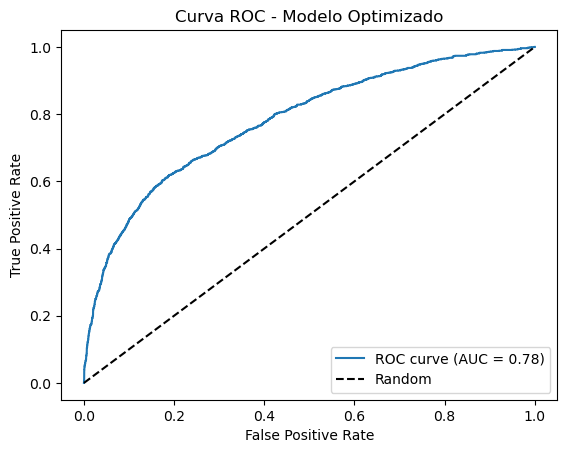

In [71]:
# -------------------- 8. Curva ROC ---------------------------------------
fpr, tpr, thresholds = roc_curve(y_test, best_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score(y_test, best_proba):.2f})')
plt.plot([0,1], [0,1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Modelo Optimizado')
plt.legend(loc='lower right')
plt.show()

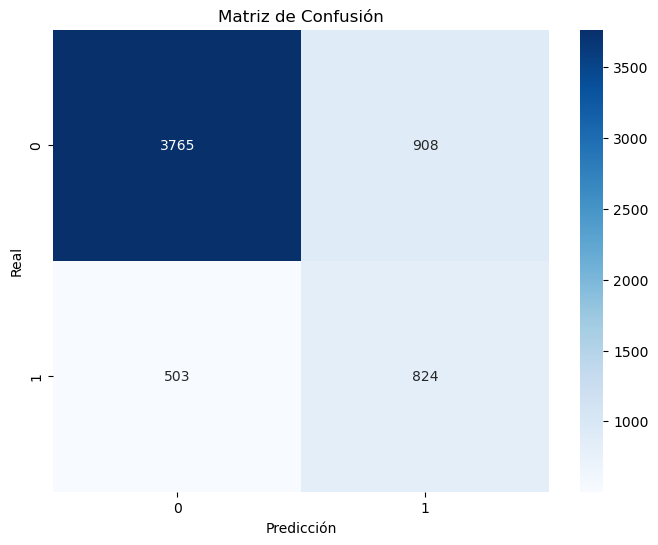

In [72]:
# -------------------- 9. Matriz de Confusión ----------------------------------
cm = confusion_matrix(y_test, best_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()


### DEPLOYMENT

In [73]:
# import mlflow
# import mlflow.sklearn

# # … código de evaluación …

# # 10. Loguear en MLflow
# with mlflow.start_run() as run:
#     mlflow.sklearn.log_model(best_model, "model")  
#     mlflow.log_metric("roc_auc", roc_auc_score(y_test, best_proba))
#     mlflow.log_metric("accuracy", accuracy_score(y_test, best_pred))
#     run_id = run.info.run_id
#     print(f"Modelo registrado en run {run_id}")


In [85]:
import os
# -------------------- 10. Persistencia y registro en MLflow --------------
# Configurar MLflow para usar la carpeta local 'mlruns'
mlflow.set_tracking_uri(f"file:///{os.path.abspath('mlruns')}")
mlflow.set_experiment("Entrega3_Deployment")

with mlflow.start_run() as run:
    # Registrar el pipeline completo como artefacto en 'model'
    mlflow.sklearn.log_model(best_model, artifact_path="model")
    # Registrar métricas clave
    mlflow.log_metric("roc_auc", roc_auc_score(y_test, best_proba))
    mlflow.log_metric("accuracy", accuracy_score(y_test, best_pred))

    run_id = run.info.run_id
    print(f"\n✅ Modelo registrado en run {run_id}")
    print("   Revisa la carpeta mlruns/0/" + run_id + " para ver el artefacto.")



2025/07/24 01:10:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/24 01:10:40 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\Lenovo\AppData\Local\Temp\tmpkhoc5ywd\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.6.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 
2025/07/24 01:10:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



✅ Modelo registrado en run 51262f1e426e4745b1060fdb18ca399b
   Revisa la carpeta mlruns/0/51262f1e426e4745b1060fdb18ca399b para ver el artefacto.


In [ ]:
# import mlflow
# from sklearn.linear_model import LogisticRegression
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split

# # 1. Asegúrate de que MLflow apunte a la carpeta correcta
# mlflow.set_tracking_uri("file:///C:/Users/Lenovo/mlruns")  # usa tu ruta exacta
# mlflow.set_experiment("Entrega3_Deployment")               # experimento que verás a la izquierda

# # 2. Pequeña prueba para crear un run
# X, y = load_iris(return_X_y=True)
# X_tr, X_te, y_tr, y_te = train_test_split(X, y, random_state=42, test_size=0.2)

# with mlflow.start_run() as run:
#     clf = LogisticRegression(max_iter=200).fit(X_tr, y_tr)
#     mlflow.sklearn.log_model(clf, name="model")
#     mlflow.log_metric("accuracy", clf.score(X_te, y_te))
#     print("Run ID:", run.info.run_id)


2025/07/24 00:56:15 INFO mlflow.tracking.fluent: Experiment with name 'Entrega3_Deployment' does not exist. Creating a new experiment.
2025/07/24 00:56:17 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\Lenovo\AppData\Local\Temp\tmpr9cwhhnp\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.6.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 
2025/07/24 00:56:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run ID: 358ee411bf8742579a0cd1dad7ab8f4d


## Comparación de modelos

| Modelo                                    | Accuracy | Precision (1) | Recall (1) | F1-score (1) | ROC AUC |
|-------------------------------------------|----------|----------------|-------------|---------------|---------|
| Regresión Logística (todas las vars)      | 0.537    | 0.28           | 0.72        | 0.41          | —       |
| Regresión Logística (vars seleccionadas)  | 0.750    | 0.45           | 0.53        | 0.49          | —       |
| SVM (vars seleccionadas)                  | 0.764    | 0.47           | 0.56        | 0.51          | 0.690   |
| Random Forest (baseline)                  | 0.813    | 0.63           | 0.37        | 0.46          | —       |
| Random Forest (optimizado)                | 0.790    | 0.53           | 0.54        | 0.54          | 0.700   |
| XGBoost (baseline)                        | 0.760    | 0.47           | 0.62        | 0.53          | 0.776   |
| XGBoost (optimizado)                      | 0.765    | 0.48           | 0.62        | 0.54          | 0.780   |


## Insights Relevantes

- Las métricas corresponden a la clase positiva (1), que representa a los clientes que no pagarán su crédito.

- Los modelos Random Forest y XGBoost (con tuning) ofrecen un balance superior entre recall y precisión para la clase minoritaria.

- ROC AUC disponible solo en los modelos optimizados.

## Comparación general


- Modelos como la **regresión logística completa** priorizan el recall pero sacrifican mucho la precisión ademas de tener recall tambien bajo
- **Random Forest base** alcanza el mayor accuracy, pero su bajo recall sobre la clase 1 lo hace menos confiable para este problema.
- **SVM y Random Forest optimizado** ofrecen un balance más adecuado.
- Finalmente, **XGBoost con ajuste de hiperparámetros destaca como el modelo con mejor desempeño global**, ya que logra:
  - Buen accuracy general (0.765)
  - Balance entre precisión (0.48) y recall (0.62)
  - **Mayor AUC (0.780)**, lo que demuestra su capacidad de distinguir correctamente entre clases en distintos umbrales de decisión.

## **Conclusión**:  
Dado el objetivo de anticipar incumplimientos con bajo margen de error, el modelo más robusto para esta tarea es **XGBoost optimizado**, al ofrecer un equilibrio entre sensibilidad, precisión y desempeño general.